y = 2*x+1<br>
を<br>
y = w0*1 + w1*x + w2*x^2 + w3*x^3 + w4*x^4<br>
で近似する

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [59]:
x = tf.placeholder(tf.float32,[None,5])

In [60]:
w = tf.Variable(tf.zeros([5,1]))#5次元

In [61]:
y = tf.matmul(x,w)

In [62]:
t = tf.placeholder(tf.float32,[None,1])

In [63]:
loss = tf.reduce_sum(tf.square(y-t))

In [64]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [65]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [120]:
def f(x):
    return 2*x+1

In [94]:
train_x = np.zeros([12,5])
for row,month in enumerate(range(1,13)):
    for col,n in enumerate(range(0,5)):
        train_x[row][col] = month**n

In [95]:
train_x.shape

(12, 5)

In [115]:
train_t = np.arange(1,13)

In [149]:
train_t = np.array([3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.0,23.0,25.0])
train_t = train_t.reshape([12,1])



# ここをtrain_t = f(np.arange(1,13))
# みたいにしたいけど, runでエラーが出た

# tmp = np.random.random(12)
# train_t = f(tmp)
# train_x = np.zeros([12,5])
# for row,month in enumerate(range(1,13)):
#     for col,n in enumerate(range(0,5)):
#         train_x[row][col] = tmp[row]**n
# みたいにする

In [141]:
train_t.shape

(12, 1)

In [142]:
for i in range(10000):
    sess.run(train_step,feed_dict={x:train_x,t:train_t})
    if i%1000==0:
        loss_val = sess.run(loss,feed_dict={x:train_x,t:train_t})
        print('step:',i,'loss:',loss_val)

step: 0 loss: 1708.99
step: 1000 loss: 9.27798
step: 2000 loss: 5.22212
step: 3000 loss: 3.7223
step: 4000 loss: 2.69819
step: 5000 loss: 3.85568
step: 6000 loss: 1.36065
step: 7000 loss: 7.51011
step: 8000 loss: 0.778514
step: 9000 loss: 0.626645


In [143]:
#12
#パラメータの確認
w_val = sess.run(w)
print(w_val)

[[ 2.04382658]
 [ 0.58898419]
 [ 0.47610584]
 [-0.05733213]
 [ 0.00212921]]


In [144]:
def predict(x):
    result = 0.0
    for n in range(0,5):
        result += w_val[n][0] * x**n
    return result

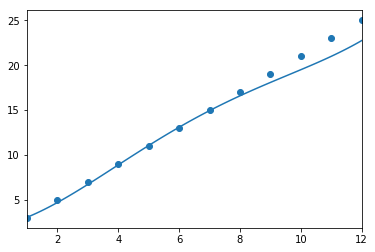

In [148]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13),train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()